In [89]:
!pip install vecstack

In [129]:
from vecstack import stacking
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score #works
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)




import warnings

warnings.filterwarnings("ignore")

In [91]:
from google.colab import drive
drive.mount('/content/drive')
!pip install gdown

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
!gdown --id 1EYCkERiK_Imda2asKEVfZJ24plLcWGT6
!gdown --id 1HQob9bazGtNEtlYD5I497UesqLH4X2Oe

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1EYCkERiK_Imda2asKEVfZJ24plLcWGT6
To: /content/train.csv
100% 18.9k/18.9k [00:00<00:00, 36.9MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1HQob9bazGtNEtlYD5I497UesqLH4X2Oe
To: /content/test.csv
100% 12.8M/12.8M [00:00<00:00, 69.8MB/s]


In [93]:
train_data = pd.read_csv('/content/drive/My Drive/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/test.csv')

print(train_data.shape)
print(test_data.shape)
print(train_data.tail())

(137, 43)
(100000, 42)
      Id   Open Date      City  City Group Type  P1   P2   P3   P4  P5  P6  P7  P8  P9  P10  P11  P12  P13  P14  P15  P16  P17  P18  P19  P20  P21  P22  P23  P24  P25  P26  P27  P28  P29  P30  P31  P32  P33  P34  P35  P36  P37    revenue
132  132  06/25/2008   Trabzon       Other   FC   2  3.0  3.0  5.0   4   2   4   4   4    4    4    4  4.0    0    0    0    0    0    4    3    2    1    1    0    0  0.0  0.0  2.0  3.0    0    0    0    0    0    0    0    0  5787594.0
133  133  10/12/2006     İzmir  Big Cities   FC   4  5.0  4.0  4.0   2   3   5   4   4    5    5    4  5.0    0    0    0    0    0    3    2    2    1    1    0    0  0.0  0.0  3.0  3.0    0    0    0    0    0    0    0    0  9262754.0
134  134  07/08/2006   Kayseri       Other   FC   3  4.0  4.0  4.0   2   3   5   5   5    5    1    5  5.0    0    0    0    0    0    2    3    1    2    2    0    0  0.0  0.0  2.0  3.0    0    0    0    0    0    0    0    0  2544857.0
135  135  10/29/2010  İst

In [94]:
test_data.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37'], dtype='object')

In [95]:
#Finding unique values for each column

column_names = train_data.columns

for column_name in column_names:
    unique_values = train_data[column_name].unique()
    print(f'{column_name}: {unique_values}')

Id: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136]
Open Date: ['07/17/1999' '02/14/2008' '03/09/2013' '02/02/2012' '05/09/2009'
 '02/12/2010' '10/11/2010' '06/21/2011' '08/28/2010' '11/16/2011'
 '08/09/2013' '05/22/2012' '02/28/2013' '10/16/2010' '12/29/2011'
 '02/07/2012' '01/07/2000' '11/08/2009' '04/21/2012' '08/16/2011'
 '08/25/2010' '01/25/2014' '07/01/2006' '06/03/2009' '09/20/2009'
 '12/23/2011' '02/23/2010' '10/09/1999' '01/28/1998' '10/13/2006'
 '12/01/2008' '12/31/2012' '01/1

In [96]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [97]:
#Finding missing values
missing_values = train_data.isna().sum()
missing_values[missing_values > 0] #no missing values for the dataset

Series([], dtype: int64)

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
#Finding correlation
train_data.corr()



,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
Id,1.000000,-0.026351,-0.036991,-0.025033,-0.001914,0.010108,-0.025953,-0.080977,-0.052129,-0.068655,-0.028977,0.013573,-0.055813,-0.021536,0.059383,0.034985,0.030277,-0.017059,-0.017792,-0.065810,-0.019534,0.020577,-0.046211,0.000609,-0.041325,-0.020668,0.014964,-0.032980,0.038232,-0.041989,0.075148,-0.019252,0.055963,-0.019958,0.067714,0.003073,0.040799,-0.065791,-0.006277
P1,-0.026351,1.000000,0.836671,0.695928,0.677941,0.302820,0.747296,0.853753,0.760820,0.765743,0.795885,0.542735,0.708360,0.708896,0.491638,0.473155,0.544892,0.412963,0.478503,0.802494,0.820953,0.654138,0.389116,0.702120,0.425720,0.472057,0.505437,0.280761,0.843738,0.586532,0.487589,0.479175,0.552593,0.329795,0.570835,0.449182,0.554951,0.277601,0.070217
P2,-0.036991,0.836671,1.000000,0.473551,0.540322,0.203003,0.673106,0.769842,0.505116,0.481635,0.498135,0.442719,0.428065,0.410924,0.365777,0.358841,0.396337,0.332134,0.348191,0.595681,0.668683,0.522294,0.476538,0.513936,0.354225,0.378042,0.409526,0.195660,0.732712,0.322511,0.342005,0.353477,0.389376,0.234991,0.394319,0.314798,0.387938,0.161162,0.191518
P3,-0.025033,0.695928,0.473551,1.000000,0.443606,0.168891,0.570486,0.651489,0.689173,0.741967,0.764191,0.417752,0.684071,0.697519,0.393765,0.379107,0.471427,0.327644,0.425214,0.648948,0.682262,0.559543,0.243983,0.602325,0.337895,0.358244,0.393404,0.257228,0.643420,0.571525,0.473089,0.406701,0.463217,0.312269,0.501575,0.428504,0.484942,0.284065,-0.024613
P4,-0.001914,0.677941,0.540322,0.443606,1.000000,0.715406,0.595724,0.700482,0.654594,0.675336,0.685416,0.585285,0.595115,0.571611,0.347917,0.287313,0.379619,0.235605,0.359393,0.725829,0.579561,0.545285,0.076177,0.559099,0.213535,0.285547,0.288684,0.109555,0.641971,0.452364,0.387747,0.333626,0.440795,0.182820,0.434245,0.277902,0.411664,0.177916,0.035685
P5,0.010108,0.302820,0.203003,0.168891,0.715406,1.000000,0.326524,0.446154,0.447577,0.465662,0.462299,0.435002,0.409181,0.380722,0.079245,0.044635,0.164822,0.038805,0.193489,0.509874,0.343363,0.342726,-0.198689,0.354058,0.020124,0.042141,0.052430,0.008393,0.323253,0.306904,0.244032,0.112603,0.215568,0.071079,0.243040,0.173309,0.193652,0.033548,-0.028191
P6,-0.025953,0.747296,0.673106,0.570486,0.595724,0.326524,1.000000,0.738388,0.720144,0.676323,0.654594,0.432959,0.637594,0.558621,0.422343,0.426646,0.520707,0.380396,0.453924,0.530297,0.664487,0.427613,0.206913,0.486043,0.461674,0.485535,0.524207,0.334761,0.729083,0.563415,0.460618,0.477593,0.519243,0.300611,0.519635,0.413645,0.524552,0.327594,0.139094
P7,-0.080977,0.853753,0.769842,0.651489,0.700482,0.446154,0.738388,1.000000,0.751196,0.775003,0.775642,0.503903,0.733115,0.702162,0.457255,0.429170,0.529988,0.365565,0.496990,0.758294,0.793642,0.604106,0.270211,0.651876,0.375711,0.404787,0.437787,0.279604,0.739868,0.584071,0.509213,0.452471,0.531011,0.339178,0.562561,0.457721,0.543563,0.309678,0.051165
P8,-0.052129,0.760820,0.505116,0.689173,0.654594,0.447577,0.720144,0.751196,1.000000,0.919956,0.881650,0.230823,0.889829,0.810365,0.351134,0.303275,0.456162,0.294639,0.430591,0.667079,0.612958,0.420807,0.045803,0.512021,0.323116,0.358971,0.396246,0.319507,0.630284,0.754736,0.454937,0.420425,0.516617,0.256416,0.524474,0.405709,0.499777,0.308294,-0.084215
P9,-0.068655,0.765743,0.481635,0.741967,0.675336,0.465662,0.676323,0.775003,0.919956,1.000000,0.961266,0.398431,0.971593,0.905105,0.413468,0.379923,0.517326,0.333071,0.488788,0.717049,0.710714,0.559405,0.055999,0.621546,0.339668,0.379653,0.412378,0.308448,0.635144,0.789784,0.502670,0.467334,0.544749,0.326869,0.582042,0.467916,0.551953,0.330927,-0.050352


<Axes: >

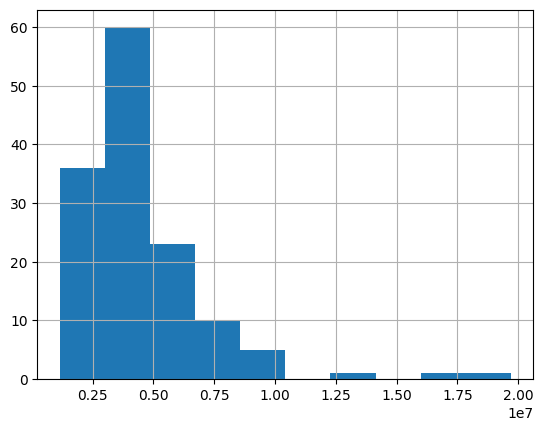

In [100]:
train_data["revenue"].hist()

In [101]:
y = train_data["revenue"]
X = train_data.drop(["revenue"],axis=1)

In [102]:
#Calculate open days from starting date to 1 january 2018 on training data
X['Open Date'] = pd.to_datetime(X['Open Date'], format='%m/%d/%Y')
X['OpenDays']=""

dateLastTrain = pd.DataFrame({'Date':np.repeat(['01/01/2018'],[len(X)]) })
dateLastTrain['Date'] = pd.to_datetime(dateLastTrain['Date'], format='%m/%d/%Y')

X['OpenDays'] = dateLastTrain['Date'] - X['Open Date']
X['OpenDays'] = X['OpenDays'].astype('timedelta64[D]').astype(int)

X = X.drop('Open Date', axis=1)

In [103]:
X.tail()

,Id,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,OpenDays
132,132,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,3477
133,133,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,4099
134,134,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,4195
135,135,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,2621
136,136,İstanbul,Big Cities,FC,4,5.0,3.0,5.0,2,2,5,4,4,5,4,4,5.0,0,0,0,0,0,2,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,3044


In [104]:
#Calculate open days from starting date to 1 january 2018 on test data
test_data['Open Date'] = pd.to_datetime(test_data['Open Date'], format='%m/%d/%Y')
test_data['OpenDays']=""

dateLastTrain_test = pd.DataFrame({'Date':np.repeat(['01/01/2018'],[len(test_data)]) })
dateLastTrain_test['Date'] = pd.to_datetime(dateLastTrain_test['Date'], format='%m/%d/%Y')

test_data['OpenDays'] = dateLastTrain_test['Date'] - test_data['Open Date']
test_data['OpenDays'] = test_data['OpenDays'].astype('timedelta64[D]').astype(int)

test_data = test_data.drop('Open Date', axis=1)

In [105]:
test_data.tail()

,Id,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,OpenDays
99995,99995,Antalya,Other,FC,5,5.0,4.0,4.0,2,2,5,5,4,4,4,4,4.0,0,0,0,0,0,3,1,1,3,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,6571
99996,99996,Niğde,Other,IL,1,2.0,4.0,3.0,1,1,1,5,5,5,2,4,5.0,0,0,0,1,0,1,1,1,1,2,0,0,0.0,0.0,1.0,3.0,5,0,0,0,4,0,0,0,2359
99997,99997,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,1,2,5,3,4,5,5,4,5.0,0,4,4,3,3,3,5,4,5,5,4,4,4.0,3.0,4.0,1.0,5,5,3,2,4,4,4,2,1829
99998,99998,İstanbul,Big Cities,FC,12,7.5,6.0,6.0,4,4,10,10,10,10,6,10,7.5,0,0,0,0,0,20,9,3,3,15,0,2,0.0,0.0,7.5,5.0,0,0,0,4,0,0,0,0,1542
99999,99999,İstanbul,Big Cities,IL,2,5.0,4.0,4.0,2,2,5,5,5,4,4,4,5.0,5,0,0,1,1,5,4,1,2,1,5,0,0.0,1.0,5.0,3.0,0,2,0,2,2,4,2,0,2645


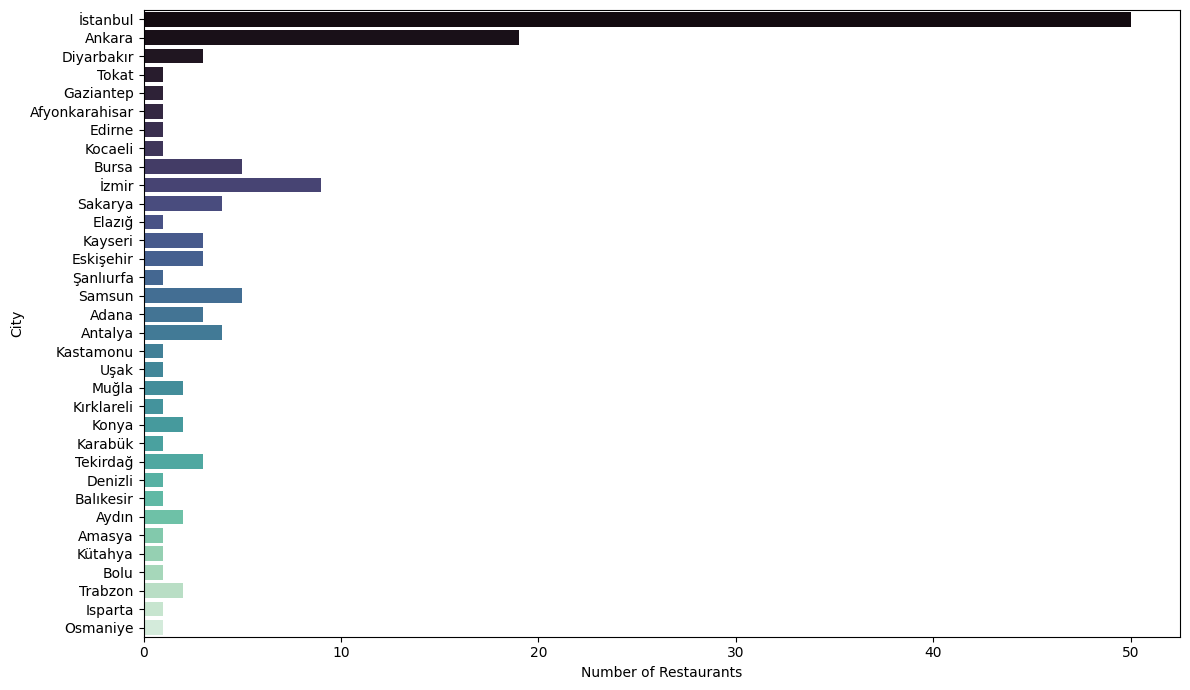

In [106]:
plt.figure(figsize=(12,7))
sns.countplot(y= train_data["City"],palette="mako")
plt.xlabel("Number of Restaurants")
plt.tight_layout()

In [107]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          100000 non-null  int64  
 1   City        100000 non-null  object 
 2   City Group  100000 non-null  object 
 3   Type        100000 non-null  object 
 4   P1          100000 non-null  int64  
 5   P2          100000 non-null  float64
 6   P3          100000 non-null  float64
 7   P4          100000 non-null  float64
 8   P5          100000 non-null  int64  
 9   P6          100000 non-null  int64  
 10  P7          100000 non-null  int64  
 11  P8          100000 non-null  int64  
 12  P9          100000 non-null  int64  
 13  P10         100000 non-null  int64  
 14  P11         100000 non-null  int64  
 15  P12         100000 non-null  int64  
 16  P13         100000 non-null  float64
 17  P14         100000 non-null  int64  
 18  P15         100000 non-null  int64  
 19  P16

In [108]:
categoricalFeatures = ["City", "City Group", "Type"]
ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)
X_ohe = pd.DataFrame(ohe.fit_transform(X[categoricalFeatures]),columns=ohe.get_feature_names_out(),index=X.index)
X = pd.concat([X,X_ohe],axis=1)
X.drop(labels=categoricalFeatures,axis=1,inplace=True)
X.tail()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,OpenDays,City_Adana,City_Afyonkarahisar,City_Amasya,City_Ankara,City_Antalya,City_Aydın,City_Balıkesir,City_Bolu,City_Bursa,City_Denizli,City_Diyarbakır,City_Edirne,City_Elazığ,City_Eskişehir,City_Gaziantep,City_Isparta,City_Karabük,City_Kastamonu,City_Kayseri,City_Kocaeli,City_Konya,City_Kütahya,City_Kırklareli,City_Muğla,City_Osmaniye,City_Sakarya,City_Samsun,City_Tekirdağ,City_Tokat,City_Trabzon,City_Uşak,City_İstanbul,City_İzmir,City_Şanlıurfa,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_IL
132,132,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,3477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
133,133,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,4099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
134,134,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,4195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
135,135,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,2621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
136,136,4,5.0,3.0,5.0,2,2,5,4,4,5,4,4,5.0,0,0,0,0,0,2,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,3044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [109]:
X_ohe_test = pd.DataFrame(ohe.fit_transform(test_data[categoricalFeatures]),columns=ohe.get_feature_names_out(),index=test_data.index)
test_data = pd.concat([test_data,X_ohe_test],axis=1)
test_data.drop(labels=categoricalFeatures,axis=1,inplace=True)
test_data.tail()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,OpenDays,City_Adana,City_Afyonkarahisar,City_Aksaray,City_Ankara,City_Antalya,City_Artvin,City_Aydın,City_Balıkesir,City_Batman,City_Bilecik,City_Bolu,City_Bursa,City_Denizli,City_Diyarbakır,City_Düzce,City_Edirne,City_Erzincan,City_Erzurum,City_Eskişehir,City_Gaziantep,City_Giresun,City_Hatay,City_Isparta,City_Kahramanmaraş,City_Kars,City_Kayseri,City_Kocaeli,City_Konya,City_Kütahya,City_Kırklareli,City_Kırıkkale,City_Kırşehir,City_Malatya,City_Manisa,City_Mardin,City_Mersin,City_Muğla,City_Nevşehir,City_Niğde,City_Ordu,City_Rize,City_Sakarya,City_Samsun,City_Siirt,City_Sivas,City_Tanımsız,City_Tekirdağ,City_Trabzon,City_Uşak,City_Yalova,City_Zonguldak,City_Çanakkale,City_Çankırı,City_Çorum,City_İstanbul,City_İzmir,City_Şanlıurfa,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_IL,Type_MB
99995,99995,5,5.0,4.0,4.0,2,2,5,5,4,4,4,4,4.0,0,0,0,0,0,3,1,1,3,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,6571,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
99996,99996,1,2.0,4.0,3.0,1,1,1,5,5,5,2,4,5.0,0,0,0,1,0,1,1,1,1,2,0,0,0.0,0.0,1.0,3.0,5,0,0,0,4,0,0,0,2359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
99997,99997,4,5.0,4.0,4.0,1,2,5,3,4,5,5,4,5.0,0,4,4,3,3,3,5,4,5,5,4,4,4.0,3.0,4.0,1.0,5,5,3,2,4,4,4,2,1829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
99998,99998,12,7.5,6.0,6.0,4,4,10,10,10,10,6,10,7.5,0,0,0,0,0,20,9,3,3,15,0,2,0.0,0.0,7.5,5.0,0,0,0,4,0,0,0,0,1542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
99999,99999,2,5.0,4.0,4.0,2,2,5,5,5,4,4,4,5.0,5,0,0,1,1,5,4,1,2,1,5,0,0.0,1.0,5.0,3.0,0,2,0,2,2,4,2,0,2645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [110]:
X = X.drop(["Id"],axis=1)

In [111]:
test_data = test_data.drop(["Id"],axis=1)
X.tail()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,OpenDays,City_Adana,City_Afyonkarahisar,City_Amasya,City_Ankara,City_Antalya,City_Aydın,City_Balıkesir,City_Bolu,City_Bursa,City_Denizli,City_Diyarbakır,City_Edirne,City_Elazığ,City_Eskişehir,City_Gaziantep,City_Isparta,City_Karabük,City_Kastamonu,City_Kayseri,City_Kocaeli,City_Konya,City_Kütahya,City_Kırklareli,City_Muğla,City_Osmaniye,City_Sakarya,City_Samsun,City_Tekirdağ,City_Tokat,City_Trabzon,City_Uşak,City_İstanbul,City_İzmir,City_Şanlıurfa,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_IL
132,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,3477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
133,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,4099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
134,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,4195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
135,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,2621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
136,4,5.0,3.0,5.0,2,2,5,4,4,5,4,4,5.0,0,0,0,0,0,2,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,3044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [112]:
test_data.tail()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,OpenDays,City_Adana,City_Afyonkarahisar,City_Aksaray,City_Ankara,City_Antalya,City_Artvin,City_Aydın,City_Balıkesir,City_Batman,City_Bilecik,City_Bolu,City_Bursa,City_Denizli,City_Diyarbakır,City_Düzce,City_Edirne,City_Erzincan,City_Erzurum,City_Eskişehir,City_Gaziantep,City_Giresun,City_Hatay,City_Isparta,City_Kahramanmaraş,City_Kars,City_Kayseri,City_Kocaeli,City_Konya,City_Kütahya,City_Kırklareli,City_Kırıkkale,City_Kırşehir,City_Malatya,City_Manisa,City_Mardin,City_Mersin,City_Muğla,City_Nevşehir,City_Niğde,City_Ordu,City_Rize,City_Sakarya,City_Samsun,City_Siirt,City_Sivas,City_Tanımsız,City_Tekirdağ,City_Trabzon,City_Uşak,City_Yalova,City_Zonguldak,City_Çanakkale,City_Çankırı,City_Çorum,City_İstanbul,City_İzmir,City_Şanlıurfa,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_IL,Type_MB
99995,5,5.0,4.0,4.0,2,2,5,5,4,4,4,4,4.0,0,0,0,0,0,3,1,1,3,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,6571,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
99996,1,2.0,4.0,3.0,1,1,1,5,5,5,2,4,5.0,0,0,0,1,0,1,1,1,1,2,0,0,0.0,0.0,1.0,3.0,5,0,0,0,4,0,0,0,2359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
99997,4,5.0,4.0,4.0,1,2,5,3,4,5,5,4,5.0,0,4,4,3,3,3,5,4,5,5,4,4,4.0,3.0,4.0,1.0,5,5,3,2,4,4,4,2,1829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
99998,12,7.5,6.0,6.0,4,4,10,10,10,10,6,10,7.5,0,0,0,0,0,20,9,3,3,15,0,2,0.0,0.0,7.5,5.0,0,0,0,4,0,0,0,0,1542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
99999,2,5.0,4.0,4.0,2,2,5,5,5,4,4,4,5.0,5,0,0,1,1,5,4,1,2,1,5,0,0.0,1.0,5.0,3.0,0,2,0,2,2,4,2,0,2645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [113]:
#Compares test to X to drop columns from test that are not present in X
#If a column is present in test and absent in X it is dropped from test
for i in test_data.columns:
    if i not in X.columns:
        print(i)
        test_data = test_data.drop([i], axis =1)

City_Aksaray
City_Artvin
City_Batman
City_Bilecik
City_Düzce
City_Erzincan
City_Erzurum
City_Giresun
City_Hatay
City_Kahramanmaraş
City_Kars
City_Kırıkkale
City_Kırşehir
City_Malatya
City_Manisa
City_Mardin
City_Mersin
City_Nevşehir
City_Niğde
City_Ordu
City_Rize
City_Siirt
City_Sivas
City_Tanımsız
City_Yalova
City_Zonguldak
City_Çanakkale
City_Çankırı
City_Çorum
Type_MB


In [114]:
#If a column is present in X and absent in test it is dropped from X
for i in X.columns:
    if i not in test_data.columns:
        print(i)
        X = X.drop([i], axis =1)

City_Amasya
City_Elazığ
City_Karabük
City_Kastamonu
City_Osmaniye
City_Tokat


In [115]:
print(X.shape)
print(test_data.shape)

(137, 71)
(100000, 71)


In [116]:
from sklearn.tree import DecisionTreeRegressor
#Constructing decision tree
clf = DecisionTreeRegressor()
clf.fit(X,y)
clf_predict_train = clf.predict(X)

#clf feature importance
mean_squared_error(y, clf_predict_train)
print("RMSE (training) for Decision Tree:{0:10f}".format(mean_squared_error(y, clf_predict_train)))

RMSE (training) for Decision Tree:  0.000000


In [117]:
#Hyperparameter tuning done for decision tree classifier
dt_parameters={'min_samples_split' : range(10,100,10),'max_depth': range(1,20,2)}
clf_random = RandomizedSearchCV(clf,dt_parameters,scoring='neg_root_mean_squared_error',random_state=42)
clf_random.fit(X, y)
random_parm=clf_random.best_params_
print(random_parm)

{'min_samples_split': 90, 'max_depth': 5}


In [118]:
#Using the parameters obtained from HyperParameterTuning in the Decision tree regressor
clf = DecisionTreeRegressor(**random_parm)
clf.fit(X, y)
clf_predict_tuned = clf.predict(X)
mean_squared_error(y, clf_predict_tuned)
print("RMSE (training) for Decision Tree:{0:10f}".format(mean_squared_error(y, clf_predict_tuned)))

RMSE (training) for Decision Tree:5861266743524.193359


In [119]:
from sklearn.model_selection import KFold
# Use KFold for cross-validation
kf = KFold(n_splits=15, shuffle=True, random_state=42)

# Store RMSE values for each fold
rmse_scores = []

# Perform cross-validation
for train_index, val_index in kf.split(X):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    clf.fit(X_train_fold, y_train_fold)
    y_pred = clf.predict(X_val_fold)
    rmse = np.sqrt(mean_squared_error(y_val_fold, y_pred))
    rmse_scores.append(rmse)

# Calculate mean RMSE across all folds
mean_rmse = np.mean(rmse_scores)
print("Mean RMSE:", mean_rmse)

Mean RMSE: 2551971.4719421193


In [120]:
#Predicting on test set
clf_predict_test = clf.predict(test_data)

In [121]:
test_data_forID = pd.read_csv('/content/drive/My Drive/test.csv')

In [122]:
df_clf = pd.DataFrame({'Id': test_data_forID['Id'],'Prediction': clf_predict_test})
df_clf.to_csv('submission_dt.csv', index=False)
from google.colab import files
files.download('submission_dt.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [123]:
rfc = RandomForestRegressor()
rfc.fit(X, y)
rfc_predict_Train=rfc.predict(X)

mean_squared_error(y,rfc_predict_Train)
print("RMSE (training) for Random Forest:{0:10f}".format(mean_squared_error(y,rfc_predict_Train)))

rand_parameters={'min_samples_leaf' : range(10,100,10),'max_depth': range(1,10,2),'max_features':[10,20,30], 'n_estimators': [10, 20, 30]}
rfc_grid = GridSearchCV(rfc,rand_parameters, cv= 5)
rfc_grid.fit(X, y)
bestrfc=rfc_grid.best_params_
print(bestrfc)
tuned_rfc = RandomForestRegressor(**bestrfc)
tuned_rfc.fit(X, y)
tuned_rfc_predict = tuned_rfc.predict(X)

mean_squared_error(y,tuned_rfc_predict)
print("RMSE (training) after tuning for Random Forest:{0:10f}".format(mean_squared_error(y,tuned_rfc_predict)))

RMSE (training) for Random Forest:904486075642.888794
{'max_depth': 9, 'max_features': 20, 'min_samples_leaf': 10, 'n_estimators': 30}
RMSE (training) after tuning for Random Forest:4644980465908.010742


In [128]:
#Predicting on test set random forest
rfc_predict_test = tuned_rfc.predict(test_data)
rf_rfc = pd.DataFrame({'Id': test_data_forID['Id'],'Prediction': rfc_predict_test})
rf_rfc.to_csv('submission_rfc.csv', index=False)
from google.colab import files
files.download('submission_rfc.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [134]:
#MLP regressor
mlp = MLPRegressor()
mlp.fit(X, y)
mlp_predict_train=mlp.predict(X)
mean_squared_error(y,mlp_predict_train)
print("RMSE (training) for MLP:{0:10f}".format(mean_squared_error(y,mlp_predict_train)))

RMSE (training) for MLP:26308259978401.613281


In [135]:
#Predicting on test set
mlp_predict_test = mlp.predict(test_data)
mlp_mlp = pd.DataFrame({'Id': test_data_forID['Id'],'Prediction': mlp_predict_test})
mlp_mlp.to_csv('submission_mlp.csv', index=False)
from google.colab import files
files.download('submission_mlp.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [130]:
gbr = GradientBoostingRegressor()
gbr.fit(X,y)
gbr.predict_train=gbr.predict(X)
mean_squared_error(y, gbr.predict_train)
print("RMSE (training) for Gradient Boost:{0:10f}".format(mean_squared_error(y, gbr.predict_train)))

RMSE (training) for Gradient Boost:447381421638.324890


In [132]:
gbr_parameters = {
    'max_features': [10, 12, 14, 16, 18, 20],  # Learning rate
    'max_depth': [3, 4, 5,6,7,8,9,10], # Maximum depth of the individual trees
}

gbr_grid = GridSearchCV(gbr,gbr_parameters, cv= 5)
gbr_grid.fit(X, y)
bestgbr=gbr_grid.best_params_
print(bestgbr)
tuned_gbr = DecisionTreeRegressor(**bestgbr)
tuned_gbr.fit(X,y)
tuned_gbr_predict = tuned_gbr.predict(X)

mean_squared_error(y,tuned_gbr_predict)
print("RMSE (training) for Gradient Boost:{0:10f}".format(mean_squared_error(y,tuned_gbr_predict)))

{'max_depth': 8, 'max_features': 16}
RMSE (training) for Gradient Boost:677798022210.076416


In [133]:
#Predicting on test set
gbr_predict_test = tuned_gbr.predict(test_data)
gbr_gbr = pd.DataFrame({'Id': test_data_forID['Id'],'Prediction': gbr_predict_test})
gbr_gbr.to_csv('submission_gbr.csv', index=False)
from google.colab import files
files.download('submission_gbr.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [136]:
models = [ DecisionTreeRegressor(), RandomForestRegressor(),MLPRegressor(), GradientBoostingRegressor()]

S_Train, S_Test = stacking(models,
                           X, y, test_data,
                           regression=True,

                           mode='oof_pred_bag',

                           needs_proba=False, shuffle = True,

                           save_dir=None,

                           n_folds=4, random_state=0,

                           verbose=2)

task:         [regression]
metric:       [mean_absolute_error]
mode:         [oof_pred_bag]
n_models:     [4]

model  0:     [DecisionTreeRegressor]
    fold  0:  [2017325.42857143]
    fold  1:  [2938590.55882353]
    fold  2:  [2267679.50000000]
    fold  3:  [2425979.44117647]
    ----
    MEAN:     [2412393.73214286] + [336930.57347555]
    FULL:     [2409510.02189781]

model  1:     [RandomForestRegressor]
    fold  0:  [1469479.70342857]
    fold  1:  [1227034.39500000]
    fold  2:  [2175690.96882353]
    fold  3:  [1862957.25176471]
    ----
    MEAN:     [1683790.57975420] + [363531.99761113]
    FULL:     [1682226.26678832]

model  2:     [MLPRegressor]
    fold  0:  [4768473.31852417]
    fold  1:  [3946625.40290232]
    fold  2:  [4915834.73409793]
    fold  3:  [4128611.30644903]
    ----
    MEAN:     [4439886.19049336] + [410699.03058036]
    FULL:     [4442284.63668337]

model  3:     [GradientBoostingRegressor]
    fold  0:  [1619611.21936982]
    fold  1:  [1543756.61

In [137]:
model = RandomForestRegressor()

model = model.fit(S_Train, y)
y_pred_train = model.predict(S_Train)
mean_squared_error(y,y_pred_train)
print("RMSE (training) for Stacked Model:{0:10f}".format(mean_squared_error(y,y_pred_train)))

RMSE (training) for Stacked Model:926687239023.728516


In [138]:
final_rfc = RandomForestRegressor()
final_rfc.fit(S_Train, y)
rf_rand = RandomizedSearchCV(final_rfc,rand_parameters, cv= 5)
rf_rand.fit(S_Train, y)
grid_parm1=rf_rand.best_params_
print(grid_parm1)

{'n_estimators': 30, 'min_samples_leaf': 30, 'max_features': 30, 'max_depth': 9}


In [140]:
final = RandomForestRegressor(**grid_parm1)
final.fit(S_Train, y)
final_predict = final.predict(S_Test)

In [141]:
final_final = pd.DataFrame({'Id': test_data_forID['Id'],'Prediction': final_predict})
final_final.to_csv('submission_final.csv', index=False)
from google.colab import files
files.download('submission_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>